In [ ]:
!pip install -U spacy
!conda install -c conda-forge spacy
!python -m spacy download es

In [9]:
import nltk
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from nltk.probability import FreqDist

import spacy
nlp = spacy.load("es_core_news_sm")

In [12]:
datafinal = pd.read_csv('./export_dataframe_profile.csv')
datafinal

,0.0,name,contacts,link,experience,education,certifications,skills,courses,languages
0,0.0,Juan Benito Cruz Veldever,272,https://www.linkedin.com/in/juan-benito-cruz-v...,"['Coordinador de seguridad', 'Supervisor de op...",[],[],[],[],['Español']
1,1.0,Juan C S.,368,https://www.linkedin.com/in/juan-c-s-56360221,"['Gerente', 'Grupo La República Publicaciones'...","['Universidad Rey Juan Carlos', 'Universidad N...",[],"['Inteligencia empresarial', 'Business Intelli...",[],['Español']
2,2.0,Juan Antonio Chumpitaz Collazos,Más de 500,https://www.linkedin.com/in/jachumpitazc,"['Data Architect Senior', 'Senior Data Archite...","['Universidad Nacional de Ingeniería', 'OBS Bu...",['Microsoft Certified: Azure Data Fundamentals...,"['Metodologías ágiles', 'Liderazgo de equipos'...",[],['Ingles']
3,3.0,Juan Martín Pariona Chuquiure,133,https://www.linkedin.com/in/juan-mart%C3%ADn-p...,"['Interbank', 'Practicante']",['Universidad Nacional de Ingeniería'],[],"['Python', 'PL/SQL', 'Microsoft Excel', 'Análi...",[],['Español']
4,4.0,Juan Gilberto Cardenas Ruiz,145,https://www.linkedin.com/in/juan-cardenas-ruiz,"['Coordinador de Canales Externos', 'Coordinad...",['Instituto SISE'],['Gestión de Proyectos con Metodologías Ágiles...,"['Liderazgo', 'Análisis de datos', 'Microsoft ...",[],['Español']
...,...,...,...,...,...,...,...,...,...,...
1241,29.0,Jose Luis Hernandez Hernandez,108,https://www.linkedin.com/in/josehernandezrrii,"['Responsable de administración', 'Gerente gen...","['Universidad Fermín Toro', 'Universidad Boliv...","['Coaching de vida', 'Financial Analyst', 'Min...","['MySQL', 'Microsoft Excel', 'Gestión de los r...",[],"['English', 'Spanish']"
1242,31.0,María Jose Rodríguez Nakagawa,42,https://www.linkedin.com/in/mar%C3%ADa-jose-ro...,"['CommEx Analyst', 'Sales Management Intern']","['Universidad de Lima', 'Universidad San Franc...","['Remote Work Revolution for Everyone', 'Diplo...","['Microsoft PowerPoint', 'Engineering', 'Analy...",['I Congreso Internacional de Innovación para ...,"['English', 'Japanese', 'Portuguese', 'Spanish']"
1243,35.0,José Rodrigo Ramos Sánchez,500+,https://www.linkedin.com/in/rodrigors,"['Analista de bases de datos', 'Pre Docente Ad...","['TECSUP', 'Pontificia Universidad Católica de...","['Aprende SCRUM', 'Power BI esencial', 'Python...","['Trabajo en equipo', 'Capacidad de análisis',...",[],['Español']
1244,36.0,Jose Martin Tuiro Achulle,139,https://www.linkedin.com/in/josetuiro,"['Analista de datos', 'Técnico de soporte de T...","['Pontificia Universidad Católica del Perú', '...","['AZ-900 Azure Fundamentals', 'Microsoft Offic...","['Microsoft Office', 'Customer Service', 'Micr...",[],['Inglés']


In [2]:
def remove_signs(val):
  characters = r"'[]"+'"'
  valor = ''.join( x for x in val if x not in characters)
  return valor

def normalize(text):
  doc = nlp(text)
  words = [t.orth_ for t in doc if not t.is_punct | t.is_stop]
  lexical_tokens = [t.lower() for t in words if len(t) > 4 and     
  t.isalpha()]
  return lexical_tokens

In [18]:
def nubePalabras(dataframe, column):
  row = datafinal[column]
  text = ''
  for i in row:
    text += remove_signs(i)
  
  # text = normalize(text)
  # removiendo los caracteres innecesarios
  pattern = r'''(?x)
              (?:[A-Z]\.)+
              | \w+(?:-\w+)*
              | \$?\d+(?:\.\d+)?%?
              | \.\.\.
              | [][.,;"'?():-_`]
  '''

  tokens = nltk.regexp_tokenize(text, pattern)

  # creando nuevos tokens
  new_tokens = []
  text = ''
  for i in tokens:
    if len(i) > 3:
      new_tokens.append(i.lower())
      text += f'{i} '

  # extraemos las frecuencias de palabras
  fdist = FreqDist(new_tokens)
  print(fdist.most_common(20))

  #impriminos la nube de palabras
  wc = WordCloud(background_color = "white", width = 1200, height = 600,
               contour_width = 0, contour_color = "red", max_words = 1000,
               scale = 1, collocations = False, repeat = True, min_font_size = 1)

  wc.generate(text)

  plt.figure(figsize = [15, 7])
  plt.imshow(wc)
  plt.axis("off")
  plt.show

## Generando nube de palabras

[('microsoft', 2840), ('gestión', 951), ('office', 924), ('excel', 863), ('análisis', 777), ('proyectos', 724), ('liderazgo', 652), ('equipos', 577), ('planificación', 550), ('empresarial', 533), ('datos', 533), ('server', 520), ('project', 477), ('estratégica', 472), ('estrategia', 438), ('management', 416), ('desarrollo', 376), ('word', 351), ('atención', 333), ('cliente', 322)]


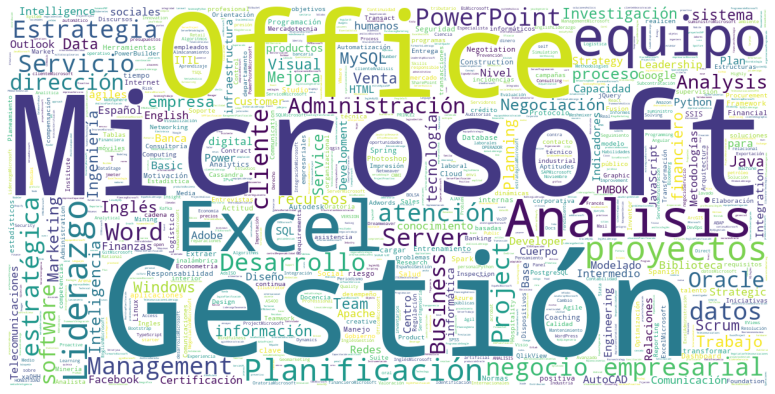

In [19]:
nubePalabras(datafinal, 'skills')

[('certified', 329), ('scrum', 323), ('certificate', 241), ('foundation', 225), ('data', 213), ('professional', 212), ('power', 179), ('fundamentals', 173), ('curso', 155), ('gestión', 154), ('master', 117), ('para', 113), ('excel', 113), ('profesional', 103), ('management', 101), ('business', 98), ('fundamentos', 96), ('python', 92), ('datos', 91), ('microsoft', 85)]


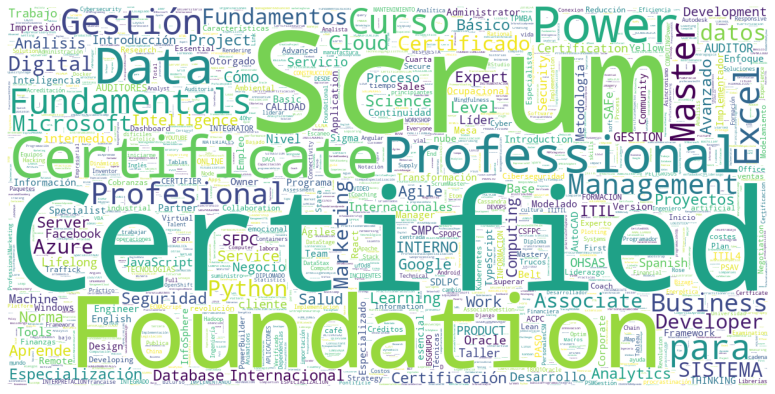

In [23]:
nubePalabras(datafinal, 'certifications')

[('analista', 1160), ('sistemas', 492), ('jefe', 381), ('asistente', 272), ('datos', 269), ('practicante', 228), ('soporte', 228), ('programador', 214), ('supervisor', 189), ('coordinador', 171), ('senior', 160), ('proyectos', 159), ('consultor', 143), ('analyst', 134), ('técnico', 134), ('gestión', 131), ('operaciones', 127), ('base', 127), ('información', 117), ('calidad', 112)]


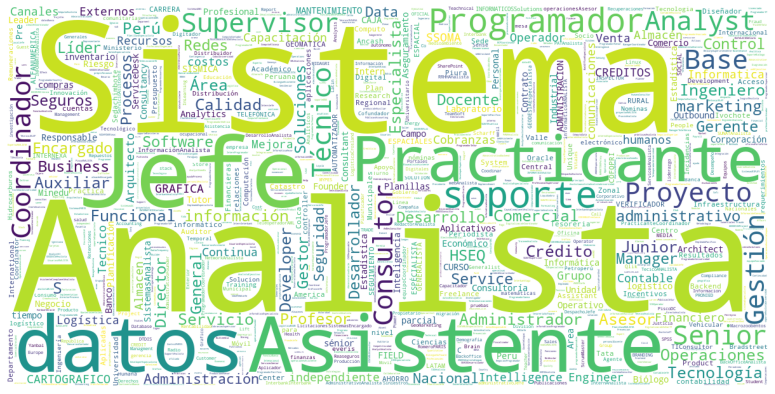

In [21]:
nubePalabras(datafinal, 'experience')

[('curso', 170), ('para', 75), ('diseño', 66), ('oracle', 62), ('gestión', 61), ('server', 61), ('sistema', 51), ('diplomado', 44), ('especialización', 43), ('análisis', 43), ('negocios', 41), ('business', 40), ('taller', 37), ('2008', 36), ('data', 34), ('developer', 33), ('java', 32), ('procesos', 31), ('mejora', 31), ('programación', 31)]


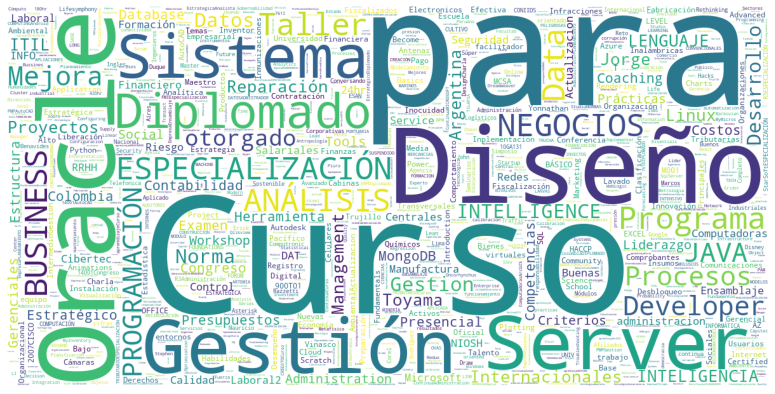

In [22]:
nubePalabras(datafinal, 'courses')